# Tutorial 71

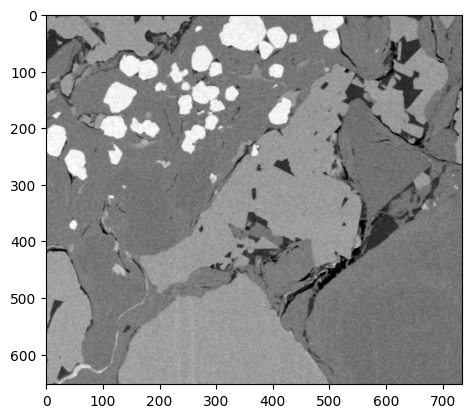

In [1]:
# https://youtu.be/H_L7V_BH9pc
"""
@author: Sreenivas Bhattiprolu
"""
#################################
#Image segmentation using K-means
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

img = io.imread("images/BSE.tif", as_gray=False)
plt.imshow(img, cmap='gray')

c:\venv\ilumpy-VS\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\venv\ilumpy-VS\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


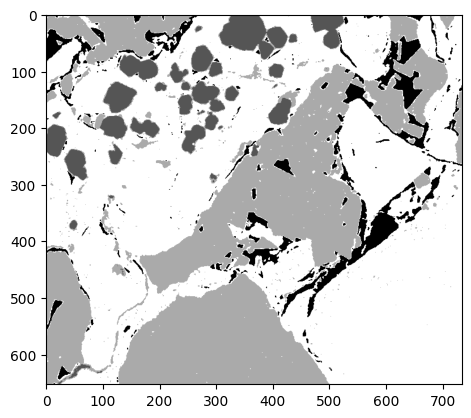

In [2]:
# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1, 3))  #-1 reshape means, in this case MxN

#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
#img2 = np.float32(img2)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
model = kmeans.fit(img2)
predicted_values = kmeans.predict(img2)

#res = center[label.flatten()]
segm_image = predicted_values.reshape((img.shape[0], img.shape[1]))
plt.imshow(segm_image, cmap='gray')

# Tutorial 72 - Gaussian Mixture Model (GMM) para segmentação

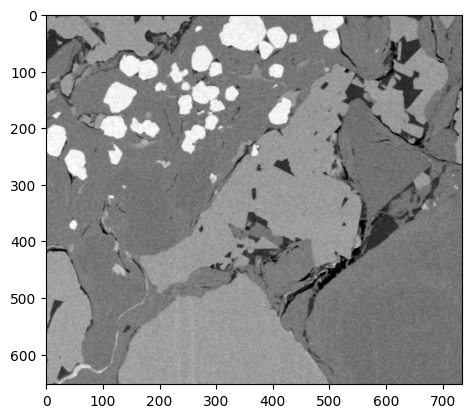

In [3]:
# https://youtu.be/__UcukytHuc
"""
@author: Sreenivas Bhattiprolu

NOTE:
Both BIC and AIC are included as built in methods as part of Scikit-Learn's  GaussianMixture. 
Therefore we do not need to import any other libraries to compute these. 
The way you compute them (for example BIC) is by fitting a GMM model and then calling the method BIC. 


"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

#Use plant cells to demo the GMM on 2 components
#Use BSE_Image to demo it on 4 components
#USe alloy.jpg to demonstrate bic and how 2 is optimal for alloy

img = cv2.imread("images/BSE.tif")
plt.imshow(img)

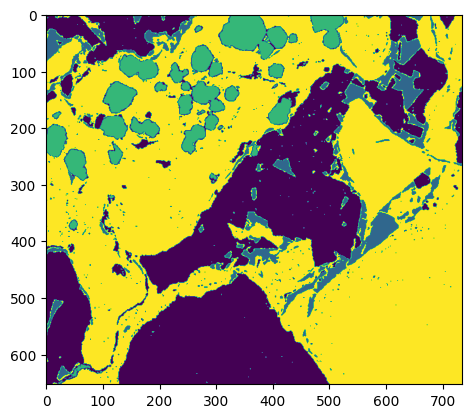

In [4]:
# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

from sklearn.mixture import GaussianMixture as GMM

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=4, covariance_type='tied').fit(img2)  #tied works better than full
gmm_labels = gmm_model.predict(img2)

#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])
plt.imshow(segmented)
#cv2.imwrite("images/segmented.jpg", segmented)

In [5]:
##############################################################
#How to know the best number of components?
#Using Bayesian information criterion (BIC) to find the best number of components
import numpy as np
import cv2

img = cv2.imread("images/BSE.tif")
img2 = img.reshape((-1,3))

from sklearn.mixture import GaussianMixture as GMM

n = 4
gmm_model = GMM(n, covariance_type='tied').fit(img2)
#The above line generates GMM model for n=4
#Now let us call the bic method (or aic if you want).

bic_value = gmm_model.bic(img2)  #Remember to call the same model name from above)
print(bic_value)  #You should see bic for GMM model generated using n=4.
#Do this exercise for different n values and plot them to find the minimum.

-6478479.201634059


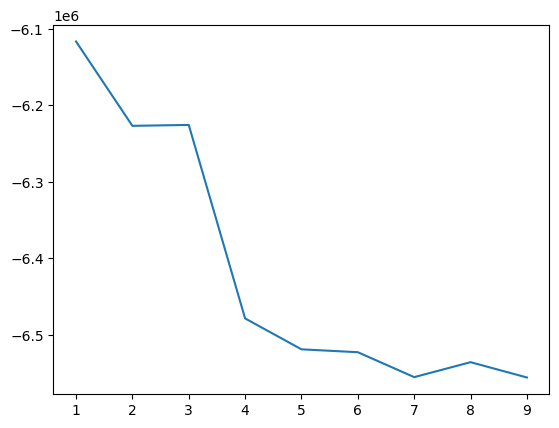

In [6]:

#Now, to explain m.bic, here are the lines I used in the video. 
n_components = np.arange(1,10)
gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')
plt.show()

# Tutorial 74 - Gabor Filter

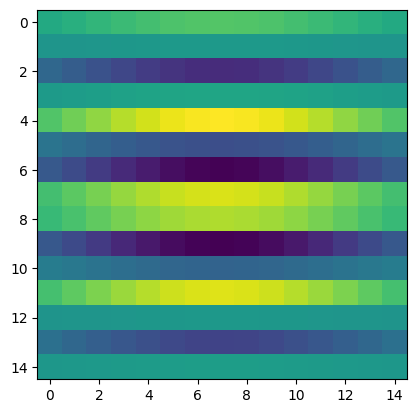

In [7]:
# https://youtu.be/yn1NUwaxhZg
"""
WHat is Gabor filter?
"""

##############################################
#Gabor filter, multiple filters in one. Generate fiter bank. 
"""
For image processing and computer vision, Gabor filters are generally 
used in texture analysis, edge detection, feature extraction, etc. 
Gabor filters are special classes of bandpass filters, i.e., they allow a certain 
‘band’ of frequencies and reject the others.


ksize Size of the filter returned.
sigma Standard deviation of the gaussian envelope.
theta Orientation of the normal to the parallel stripes of a Gabor function.
lambda Wavelength of the sinusoidal factor.
gamma Spatial aspect ratio.
psi Phase offset.
ktype Type of filter coefficients. It can be CV_32F or CV_64F.
indicates the type and range of values that each pixel in the Gabor kernel can hold.
Basically float32 or float64

"""

import numpy as np
import cv2
import matplotlib.pyplot as plt

ksize = 15  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 5 #Large sigma on small features will fully miss the features. 
theta = 1*np.pi/2  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda = 1*np.pi/4  #1/4 works best for angled. 
gamma=0.9  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0.8  #Phase offset. I leave it to 0. (For hidden pic use 0.8)


kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

plt.imshow(kernel)

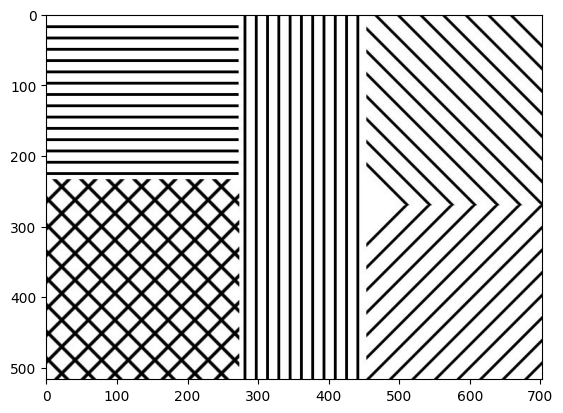

In [8]:
img = cv2.imread('images/synthetic.jpg')
plt.imshow(img, cmap='gray')

### Mudem o kernel para entender o que o filtro faz

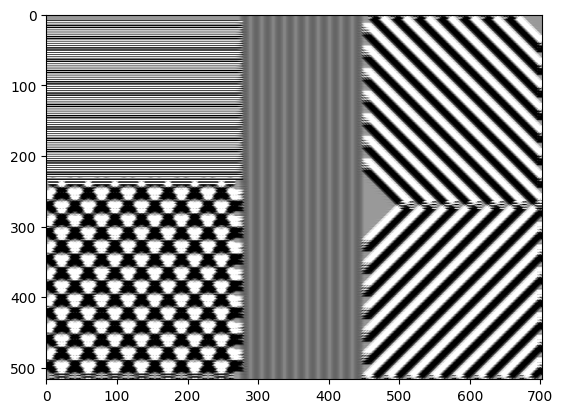

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

kernel_resized = cv2.resize(kernel, (400, 400))                    # Resize image

plt.imshow(kernel_resized)
plt.imshow(fimg, cmap='gray')

#cv2.imshow('Kernel', kernel_resized)
#cv2.imshow('Original Img.', img)
#cv2.imshow('Filtered', fimg)
#cv2.waitKey()
#cv2.destroyAllWindows()

# Tutorial 75 - Extraíndo features!

In [10]:
# https://youtu.be/ywyomOyXpxg

import numpy as np
import cv2
import pandas as pd
 
#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread('images/synthetic.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 
cv2.imshow('Filtered', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=5  #Try 15 for hidden image. Or 9 for others
                phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                filtered_img = fimg.reshape(-1)
                
                cv2.imwrite('images/gabor_filtered_images/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                
                num += 1  #Increment for gabor column label
                
print(df.head())

#df.to_csv("Gabor.csv")

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor104 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor105 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor106 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor107 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor108 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor109 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor110 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor111 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor112 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor113 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor114 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor115 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor116 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor117 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor118 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor119 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor120 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor121 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor122 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor123 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor124 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor125 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor126 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor127 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor128 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor129 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor130 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor131 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor132 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor133 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor134 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor135 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor136 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor137 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor138 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor139 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor140 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor141 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor142 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor143 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor144 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor145 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor146 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor147 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor148 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor149 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor150 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor151 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor152 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor153 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor154 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor155 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor156 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor157 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor158 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor159 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor160 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor161 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor162 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor163 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor164 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor165 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor166 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor167 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor168 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor169 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor170 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor171 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor172 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor173 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor174 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor175 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor176 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor177 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor178 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor179 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor180 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor181 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor182 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor183 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor184 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor185 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.0 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor186 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor187 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor188 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor189 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor190 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor191 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor192 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor193 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor194 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor195 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor196 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor197 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor198 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor199 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor200 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor201 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor202 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor203 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor204 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor205 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor206 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor207 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor208 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor209 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor210 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor211 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor212 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor213 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor214 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor215 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor216 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor217 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor218 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor219 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor220 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor221 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor222 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor223 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor224 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor225 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor226 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor227 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor228 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor229 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor230 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor231 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor232 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor233 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor234 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor235 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor236 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor237 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor238 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor239 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor240 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor241 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor242 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor243 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor244 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor245 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor246 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor247 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor248 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

Gabor249 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor250 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor251 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor252 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor253 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor254 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor255 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor256 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             255       0       0     255     255     213     170     100   
1             255       0       0     255     255     213     170     100   
2             255       0       0     255     255     213     170     100   
3             25

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\3730217004.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [12]:
import cv2
import numpy as np
import pandas as pd
import itertools

# Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

# Generate Gabor features
num = 1  # To count numbers up in order to give Gabor features a label in the data frame
kernels = []  # Create an empty list to hold all kernels that we will generate in a loop

# Define parameter ranges
thetas = [theta / 4. * np.pi for theta in range(8)]
sigmas = [1, 3, 5, 7]
lamdas = np.arange(0, np.pi, np.pi / 4)
gammas = [0.05, 0.5]

# Use itertools.product to generate all combinations of parameters
for theta, sigma, lamda, gamma in itertools.product(thetas, sigmas, lamdas, gammas):
    gabor_label = 'Gabor' + str(num)  # Label Gabor columns as Gabor1, Gabor2, etc.
    ksize = 5  # Try 15 for hidden image. Or 9 for others
    phi = 0  # 0.8 for hidden image. Otherwise leave it to 0
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
    kernels.append(kernel)
    
    # Now filter the image and add values to a new column
    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)  # Corrected to filter the original image
    filtered_img = fimg.reshape(-1)
    
    # Save filtered image
    cv2.imwrite(f'images/gabor_filtered_images/{gabor_label}.jpg', fimg)
    
    df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
    print(f'{gabor_label}: theta={theta}, sigma={sigma}, lamda={lamda}, gamma={gamma}')
    
    num += 1  # Increment for Gabor column label

print(df.head())

# df.to_csv("Gabor.csv")


Gabor1: theta=0.0, sigma=1, lamda=0.0, gamma=0.05
Gabor2: theta=0.0, sigma=1, lamda=0.0, gamma=0.5
Gabor3: theta=0.0, sigma=1, lamda=0.7853981633974483, gamma=0.05
Gabor4: theta=0.0, sigma=1, lamda=0.7853981633974483, gamma=0.5
Gabor5: theta=0.0, sigma=1, lamda=1.5707963267948966, gamma=0.05
Gabor6: theta=0.0, sigma=1, lamda=1.5707963267948966, gamma=0.5
Gabor7: theta=0.0, sigma=1, lamda=2.356194490192345, gamma=0.05
Gabor8: theta=0.0, sigma=1, lamda=2.356194490192345, gamma=0.5
Gabor9: theta=0.0, sigma=3, lamda=0.0, gamma=0.05
Gabor10: theta=0.0, sigma=3, lamda=0.0, gamma=0.5
Gabor11: theta=0.0, sigma=3, lamda=0.7853981633974483, gamma=0.05
Gabor12: theta=0.0, sigma=3, lamda=0.7853981633974483, gamma=0.5
Gabor13: theta=0.0, sigma=3, lamda=1.5707963267948966, gamma=0.05
Gabor14: theta=0.0, sigma=3, lamda=1.5707963267948966, gamma=0.5
Gabor15: theta=0.0, sigma=3, lamda=2.356194490192345, gamma=0.05
Gabor16: theta=0.0, sigma=3, lamda=2.356194490192345, gamma=0.5
Gabor17: theta=0.0, sigma

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

Gabor104: theta=2.356194490192345, sigma=1, lamda=2.356194490192345, gamma=0.5
Gabor105: theta=2.356194490192345, sigma=3, lamda=0.0, gamma=0.05
Gabor106: theta=2.356194490192345, sigma=3, lamda=0.0, gamma=0.5
Gabor107: theta=2.356194490192345, sigma=3, lamda=0.7853981633974483, gamma=0.05
Gabor108: theta=2.356194490192345, sigma=3, lamda=0.7853981633974483, gamma=0.5
Gabor109: theta=2.356194490192345, sigma=3, lamda=1.5707963267948966, gamma=0.05
Gabor110: theta=2.356194490192345, sigma=3, lamda=1.5707963267948966, gamma=0.5
Gabor111: theta=2.356194490192345, sigma=3, lamda=2.356194490192345, gamma=0.05
Gabor112: theta=2.356194490192345, sigma=3, lamda=2.356194490192345, gamma=0.5
Gabor113: theta=2.356194490192345, sigma=5, lamda=0.0, gamma=0.05
Gabor114: theta=2.356194490192345, sigma=5, lamda=0.0, gamma=0.5
Gabor115: theta=2.356194490192345, sigma=5, lamda=0.7853981633974483, gamma=0.05
Gabor116: theta=2.356194490192345, sigma=5, lamda=0.7853981633974483, gamma=0.5
Gabor117: theta=2

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

Gabor123: theta=2.356194490192345, sigma=7, lamda=0.7853981633974483, gamma=0.05
Gabor124: theta=2.356194490192345, sigma=7, lamda=0.7853981633974483, gamma=0.5
Gabor125: theta=2.356194490192345, sigma=7, lamda=1.5707963267948966, gamma=0.05
Gabor126: theta=2.356194490192345, sigma=7, lamda=1.5707963267948966, gamma=0.5
Gabor127: theta=2.356194490192345, sigma=7, lamda=2.356194490192345, gamma=0.05
Gabor128: theta=2.356194490192345, sigma=7, lamda=2.356194490192345, gamma=0.5
Gabor129: theta=3.141592653589793, sigma=1, lamda=0.0, gamma=0.05
Gabor130: theta=3.141592653589793, sigma=1, lamda=0.0, gamma=0.5
Gabor131: theta=3.141592653589793, sigma=1, lamda=0.7853981633974483, gamma=0.05
Gabor132: theta=3.141592653589793, sigma=1, lamda=0.7853981633974483, gamma=0.5
Gabor133: theta=3.141592653589793, sigma=1, lamda=1.5707963267948966, gamma=0.05
Gabor134: theta=3.141592653589793, sigma=1, lamda=1.5707963267948966, gamma=0.5
Gabor135: theta=3.141592653589793, sigma=1, lamda=2.35619449019234

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

Gabor139: theta=3.141592653589793, sigma=3, lamda=0.7853981633974483, gamma=0.05
Gabor140: theta=3.141592653589793, sigma=3, lamda=0.7853981633974483, gamma=0.5
Gabor141: theta=3.141592653589793, sigma=3, lamda=1.5707963267948966, gamma=0.05
Gabor142: theta=3.141592653589793, sigma=3, lamda=1.5707963267948966, gamma=0.5
Gabor143: theta=3.141592653589793, sigma=3, lamda=2.356194490192345, gamma=0.05
Gabor144: theta=3.141592653589793, sigma=3, lamda=2.356194490192345, gamma=0.5
Gabor145: theta=3.141592653589793, sigma=5, lamda=0.0, gamma=0.05
Gabor146: theta=3.141592653589793, sigma=5, lamda=0.0, gamma=0.5
Gabor147: theta=3.141592653589793, sigma=5, lamda=0.7853981633974483, gamma=0.05
Gabor148: theta=3.141592653589793, sigma=5, lamda=0.7853981633974483, gamma=0.5
Gabor149: theta=3.141592653589793, sigma=5, lamda=1.5707963267948966, gamma=0.05
Gabor150: theta=3.141592653589793, sigma=5, lamda=1.5707963267948966, gamma=0.5
Gabor151: theta=3.141592653589793, sigma=5, lamda=2.35619449019234

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

Gabor153: theta=3.141592653589793, sigma=7, lamda=0.0, gamma=0.05
Gabor154: theta=3.141592653589793, sigma=7, lamda=0.0, gamma=0.5
Gabor155: theta=3.141592653589793, sigma=7, lamda=0.7853981633974483, gamma=0.05
Gabor156: theta=3.141592653589793, sigma=7, lamda=0.7853981633974483, gamma=0.5
Gabor157: theta=3.141592653589793, sigma=7, lamda=1.5707963267948966, gamma=0.05
Gabor158: theta=3.141592653589793, sigma=7, lamda=1.5707963267948966, gamma=0.5
Gabor159: theta=3.141592653589793, sigma=7, lamda=2.356194490192345, gamma=0.05
Gabor160: theta=3.141592653589793, sigma=7, lamda=2.356194490192345, gamma=0.5
Gabor161: theta=3.9269908169872414, sigma=1, lamda=0.0, gamma=0.05
Gabor162: theta=3.9269908169872414, sigma=1, lamda=0.0, gamma=0.5
Gabor163: theta=3.9269908169872414, sigma=1, lamda=0.7853981633974483, gamma=0.05
Gabor164: theta=3.9269908169872414, sigma=1, lamda=0.7853981633974483, gamma=0.5
Gabor165: theta=3.9269908169872414, sigma=1, lamda=1.5707963267948966, gamma=0.05
Gabor166: 

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

Gabor167: theta=3.9269908169872414, sigma=1, lamda=2.356194490192345, gamma=0.05
Gabor168: theta=3.9269908169872414, sigma=1, lamda=2.356194490192345, gamma=0.5
Gabor169: theta=3.9269908169872414, sigma=3, lamda=0.0, gamma=0.05
Gabor170: theta=3.9269908169872414, sigma=3, lamda=0.0, gamma=0.5
Gabor171: theta=3.9269908169872414, sigma=3, lamda=0.7853981633974483, gamma=0.05
Gabor172: theta=3.9269908169872414, sigma=3, lamda=0.7853981633974483, gamma=0.5
Gabor173: theta=3.9269908169872414, sigma=3, lamda=1.5707963267948966, gamma=0.05
Gabor174: theta=3.9269908169872414, sigma=3, lamda=1.5707963267948966, gamma=0.5
Gabor175: theta=3.9269908169872414, sigma=3, lamda=2.356194490192345, gamma=0.05
Gabor176: theta=3.9269908169872414, sigma=3, lamda=2.356194490192345, gamma=0.5
Gabor177: theta=3.9269908169872414, sigma=5, lamda=0.0, gamma=0.05
Gabor178: theta=3.9269908169872414, sigma=5, lamda=0.0, gamma=0.5
Gabor179: theta=3.9269908169872414, sigma=5, lamda=0.7853981633974483, gamma=0.05
Gabo

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

Gabor183: theta=3.9269908169872414, sigma=5, lamda=2.356194490192345, gamma=0.05
Gabor184: theta=3.9269908169872414, sigma=5, lamda=2.356194490192345, gamma=0.5
Gabor185: theta=3.9269908169872414, sigma=7, lamda=0.0, gamma=0.05
Gabor186: theta=3.9269908169872414, sigma=7, lamda=0.0, gamma=0.5
Gabor187: theta=3.9269908169872414, sigma=7, lamda=0.7853981633974483, gamma=0.05
Gabor188: theta=3.9269908169872414, sigma=7, lamda=0.7853981633974483, gamma=0.5
Gabor189: theta=3.9269908169872414, sigma=7, lamda=1.5707963267948966, gamma=0.05
Gabor190: theta=3.9269908169872414, sigma=7, lamda=1.5707963267948966, gamma=0.5
Gabor191: theta=3.9269908169872414, sigma=7, lamda=2.356194490192345, gamma=0.05
Gabor192: theta=3.9269908169872414, sigma=7, lamda=2.356194490192345, gamma=0.5
Gabor193: theta=4.71238898038469, sigma=1, lamda=0.0, gamma=0.05
Gabor194: theta=4.71238898038469, sigma=1, lamda=0.0, gamma=0.5
Gabor195: theta=4.71238898038469, sigma=1, lamda=0.7853981633974483, gamma=0.05
Gabor196: 

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

Gabor202: theta=4.71238898038469, sigma=3, lamda=0.0, gamma=0.5
Gabor203: theta=4.71238898038469, sigma=3, lamda=0.7853981633974483, gamma=0.05
Gabor204: theta=4.71238898038469, sigma=3, lamda=0.7853981633974483, gamma=0.5
Gabor205: theta=4.71238898038469, sigma=3, lamda=1.5707963267948966, gamma=0.05
Gabor206: theta=4.71238898038469, sigma=3, lamda=1.5707963267948966, gamma=0.5
Gabor207: theta=4.71238898038469, sigma=3, lamda=2.356194490192345, gamma=0.05
Gabor208: theta=4.71238898038469, sigma=3, lamda=2.356194490192345, gamma=0.5
Gabor209: theta=4.71238898038469, sigma=5, lamda=0.0, gamma=0.05
Gabor210: theta=4.71238898038469, sigma=5, lamda=0.0, gamma=0.5
Gabor211: theta=4.71238898038469, sigma=5, lamda=0.7853981633974483, gamma=0.05
Gabor212: theta=4.71238898038469, sigma=5, lamda=0.7853981633974483, gamma=0.5
Gabor213: theta=4.71238898038469, sigma=5, lamda=1.5707963267948966, gamma=0.05
Gabor214: theta=4.71238898038469, sigma=5, lamda=1.5707963267948966, gamma=0.5
Gabor215: thet

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

Gabor223: theta=4.71238898038469, sigma=7, lamda=2.356194490192345, gamma=0.05
Gabor224: theta=4.71238898038469, sigma=7, lamda=2.356194490192345, gamma=0.5
Gabor225: theta=5.497787143782138, sigma=1, lamda=0.0, gamma=0.05
Gabor226: theta=5.497787143782138, sigma=1, lamda=0.0, gamma=0.5
Gabor227: theta=5.497787143782138, sigma=1, lamda=0.7853981633974483, gamma=0.05
Gabor228: theta=5.497787143782138, sigma=1, lamda=0.7853981633974483, gamma=0.5
Gabor229: theta=5.497787143782138, sigma=1, lamda=1.5707963267948966, gamma=0.05
Gabor230: theta=5.497787143782138, sigma=1, lamda=1.5707963267948966, gamma=0.5
Gabor231: theta=5.497787143782138, sigma=1, lamda=2.356194490192345, gamma=0.05
Gabor232: theta=5.497787143782138, sigma=1, lamda=2.356194490192345, gamma=0.5
Gabor233: theta=5.497787143782138, sigma=3, lamda=0.0, gamma=0.05
Gabor234: theta=5.497787143782138, sigma=3, lamda=0.0, gamma=0.5
Gabor235: theta=5.497787143782138, sigma=3, lamda=0.7853981633974483, gamma=0.05
Gabor236: theta=5.4

C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  # Labels columns as Gabor1, Gabor2, etc.
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\1111497182.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually th

### Vejam o diretório images/gabor_filtered_images

### Os tutoriais de segmentação de imagem com ML supervisionado, pediram cadastra em um site pago para dar label as imagens :/<br>Então vamos para a classsificação!

# Tutorial 83 - Classificação de imagens

In [13]:
# https://youtu.be/nK-2k_ENgEc
"""
@author: Sreenivas Bhattiprolu

Image classification using feature extraction + RM (or SVM)

Each set of images will be stored in separate folders with appropriate names
Folder names are taken as labels. 
You can have any number of classes. 
Usually works well with a handful of training images. 

Be mindful of memory for large images and large number of filters.
In this example for Gabor, only theta and sigma are changed. You can create infinite filters
by changing lambda, gamma, and kszie. 

"""

import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel

#Dataset from https://zenodo.org/badge/DOI/10.5281/zenodo.5226945.svg
#print(os.listdir("images/cats_dogs_light"))

#Resize images to
SIZE = 128

#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = [] 
for directory_path in glob.glob("images/cats_dogs_light/train/*"):
    #label = directory_path.split("\\")[-1]                      #!!!!!!!!!!!!!!!!!!!!!CUIDADO! ESSE É PARA WINDOWS
    label = directory_path.split("/")[-1]                        #!!!!!!!!!!!!!!!!!!!!!CUIDADO! ESSE É PARA LINUX
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print('train', label, img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Optional step. Change BGR to RGB
        train_images.append(img)
        train_labels.append(label)

#print('train_labels', train_labels)                              #!!!!!!!!!!!!!!!CONFIRA SEUS LABELS!!!!

train_images = np.array(train_images)
train_labels = np.array(train_labels)

#Do exactly the same for test/validation images
# test
test_images = []
test_labels = [] 
for directory_path in glob.glob("images/cats_dogs_light/test/*"):
    #label = directory_path.split("\\")[-1]                      #!!!!!!!!!!!!!!!!!!!!!CUIDADO! ESSE É PARA WINDOWS
    label = directory_path.split("/")[-1]                        #!!!!!!!!!!!!!!!!!!!!!CUIDADO! ESSE É PARA LINUX
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print('test', label, img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Optional step. Change BGR to RGB
        test_images.append(img)
        test_labels.append(label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

train\cat
train train\cat images/cats_dogs_light/train\cat\cat.0.jpg
train train\cat images/cats_dogs_light/train\cat\cat.1.jpg
train train\cat images/cats_dogs_light/train\cat\cat.10.jpg
train train\cat images/cats_dogs_light/train\cat\cat.100.jpg
train train\cat images/cats_dogs_light/train\cat\cat.1000 (2).jpg
train train\cat images/cats_dogs_light/train\cat\cat.1000.jpg
train train\cat images/cats_dogs_light/train\cat\cat.10000 (2).jpg
train train\cat images/cats_dogs_light/train\cat\cat.10000.jpg
train train\cat images/cats_dogs_light/train\cat\cat.10001.jpg
train train\cat images/cats_dogs_light/train\cat\cat.10002 (2).jpg
train train\cat images/cats_dogs_light/train\cat\cat.10002.jpg
train train\cat images/cats_dogs_light/train\cat\cat.10003.jpg
train train\cat images/cats_dogs_light/train\cat\cat.10004 (2).jpg
train train\cat images/cats_dogs_light/train\cat\cat.10004.jpg
train train\cat images/cats_dogs_light/train\cat\cat.10005.jpg
train train\cat images/cats_dogs_light/train

In [14]:
#Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
#If you only have one dataset then split here
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [15]:
print('x_train len', len(x_train))

x_train len 1190


In [16]:
print('x_test len', len(x_test))

x_test len 467


In [17]:
###################################################################
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    x_train = dataset
    image_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        input_img = x_train[image, :,:] #,:]
        img = input_img

    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 
            
         # FEATURE 1 - Pixel values
         
        #Add pixel values to the data frame
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
        #df['Image_Name'] = image   #Capture image name as we read multiple images
        
        # FEATURE 2 - Bunch of Gabor filter responses
        
                #Generate Gabor features
        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
        kernels = []
        for theta in range(2):   #Define number of thetas
            theta = theta / 4. * np.pi
            for sigma in (1, 3):  #Sigma with 1 and 3
                lamda = np.pi/4
                gamma = 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
         
        # FEATURE 3 Sobel
        edge_sobel = sobel(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1
       
        #Add more filters as needed
        
        #Append features from current image to the dataset
        #image_dataset = image_dataset.append(df) ###USAR APPEND PARA PYTHON MAIS ANTIGO
        image_dataset = pd.concat([image_dataset, df], ignore_index=True)
        
    return image_dataset

In [18]:
####################################################################
#Extract features from training images
image_features = feature_extractor(x_train)

#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [19]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [20]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=50, random_state = 42)

#Can also use SVM but RF is faster and may be more accurate.
#from sklearn import svm
#SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
#SVM_model.fit(X_for_RF, y_train)

# Fit the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [21]:
#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)
#print(test_prediction)
#print(test_labels)

Accuracy =  0.0


C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\2701718266.py:8: RuntimeWarning: divide by zero encountered in divide
  cm = cm / cm.astype(np.float64).sum(axis=1)
C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_4240\2701718266.py:8: RuntimeWarning: invalid value encountered in divide
  cm = cm / cm.astype(np.float64).sum(axis=1)


<Axes: >

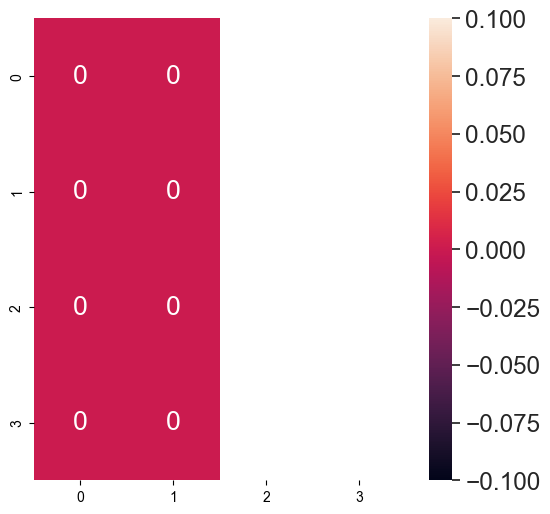

In [22]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)
cm = cm / cm.astype(np.float64).sum(axis=1)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

## Testem imagens do dataset de teste

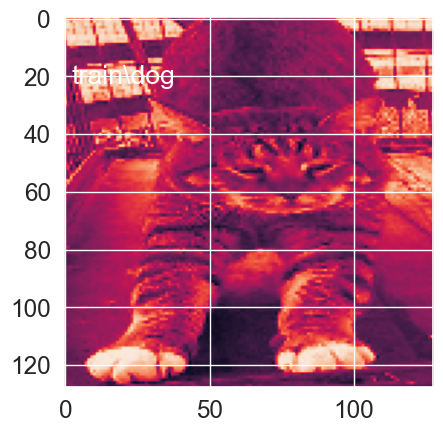

In [23]:
i = 154
plt.text(20, 20, test_prediction[i], dict(color='white', va='center', ha='center'))
plt.imshow(x_test[i])
plt.show()